In [55]:
import sys
sys.path.append('./')

from inference import Inference
import cv2
from matplotlib import pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2

In [56]:
def tensorflow_shutup():
    """
    Make Tensorflow less verbose
    """
    try:
        # noinspection PyPackageRequirements
        import os
        from tensorflow import logging
        logging.set_verbosity(logging.ERROR)
        os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

        # Monkey patching deprecation utils to shut it up! Maybe good idea to disable this once after upgrade
        # noinspection PyUnusedLocal
        def deprecated(date, instructions, warn_once=True):
            def deprecated_wrapper(func):
                return func
            return deprecated_wrapper

        from tensorflow.python.util import deprecation
        deprecation.deprecated = deprecated

    except ImportError:
        pass

tensorflow_shutup()

## Definindo o caminho para o arquivo original

In [57]:
img_full_name = '0.jpg'
img_dir = './images/'
save_dir = './out/'
img_name, extension = img_full_name.split('.')
extension = '.' + extension

## Instanciando um objeto da classe Inference 
## Essa classe constroi o grafo de execução dos modelos Stacked Hourglass e YOLO
## Também carrega os pesos treinados desses modelos.

In [58]:
inf = Inference(config_file = 'config_tiny.cfg', model = 'hg_refined_tiny_200', yoloModel = 'YOLO_small.ckpt')

CREATE MODEL:
---Inputs : Done (0 sec.)
---Graph : Done (1 sec.)
---Loss : Done (0 sec.)
---Acc : Done (4 sec.)
---LR : Done (0 sec.)
---Optim : Done (0 sec.)
---Minimizer : Done (2 sec.)
---Init : Done (0 sec.)
Model created (8 sec.)
Graph Generated in  8  sec.
Session initialization
Sess initialized in 0 sec.
Loading Trained Model
Model Loaded ( 1.0428135395050049  sec.)
YOLO created:  0.3858952522277832  sec.
Loading YOLO...
Restoring weights from: YOLO_small.ckpt
Trained YOLO Loaded:  0.8769710063934326  sec.
Prediction Tensors Ready!
Done:  11.618717908859253  sec.


## Carregando uma imagem RGB 

In [59]:
img = cv2.imread(img_dir+img_full_name)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

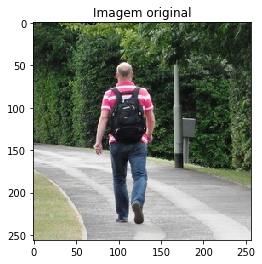

In [60]:
plt.imshow(img)
plt.title('Imagem original')
plt.show()

## Caso a imagem não seja do tamanho 256x256, redimensionar.

In [61]:
if img.shape != (256,256,3):
    print('Wrong shape. Resizing.')
    img = cv2.resize(img, (256,256))

## Mostrando as dimensões
## Deve ser (256X256X3) == (alturaXlarguraXnumero_de_canais_de_cor)

In [62]:
print('Img shape: ',img.shape)

Img shape:  (256, 256, 3)


## Chamando a função que prediz a pose, onde os parametros são:
### thresh : limiar de corte para o nivel de confiança para o keypoint
### pltJ : plotar keypoints (ou Joints)
### pltL : plotar segmentos (ou Limbs)


In [63]:
new_img = inf.pltSkeleton(img, thresh = 0.5, pltJ = True, pltL = True)

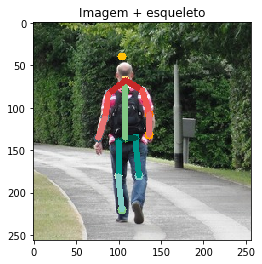

In [64]:
plt.imshow(new_img)
plt.title('Imagem + esqueleto')
plt.show()

## Nessa função a predição para na fase de detecção de pessoas

In [65]:
bb = inf.pltBoundingBoxes(img)

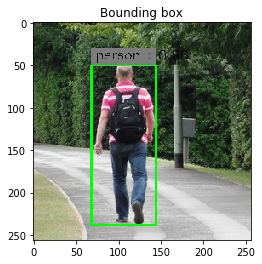

In [66]:
plt.imshow(bb)
plt.title('Bounding box')
plt.show()

## Nessa função a predição para quando temos os heatmaps, a função retorna eles

In [129]:
hm = inf.predictHM(img)
#hm = cv2.cvtColor(hm, cv2.COLOR_RGB2BGR)

In [130]:
import numpy as np

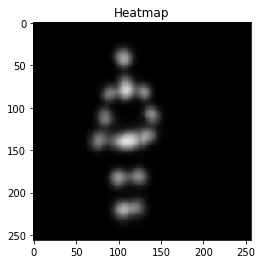

In [131]:
plt.imshow(hm.astype(np.uint8))
plt.title('Heatmap')
plt.show()